In [16]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874855,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


In [5]:
np.any(df.isnull())

False

In [8]:
df.columns.values

array(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent',
       'B_posts', 'B_network_feature_1', 'B_network_feature_2',
       'B_network_feature_3'], dtype=object)

In [6]:
X = df.iloc[:,1:12]
X.head()

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,A_network_feature_3
0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,166.500000,11355.000000
1,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,18.442971,1330.366048
2,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,68.927835,5999.896907
3,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,2.000000,96.166667
4,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,127.404293,2833.847943


In [7]:
df['Choice'].describe()

count    5500.000000
mean        0.509455
std         0.499956
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Choice, dtype: float64

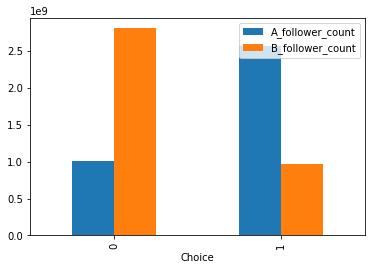

In [11]:
df2 = df[['A_follower_count','B_follower_count','Choice']]
group2 = df2.groupby('Choice')
group2.size()
total1 = group2.sum()

#Visualizing the data
my_plot = total1.plot(kind='bar')

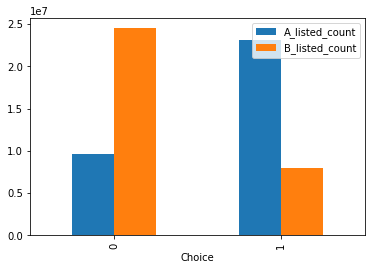

In [13]:
df2 = df[['A_listed_count','B_listed_count','Choice']]
group2 = df2.groupby('Choice')
group2.size()
total1 = group2.sum()

#Visualizing the data
my_plot = total1.plot(kind='bar')

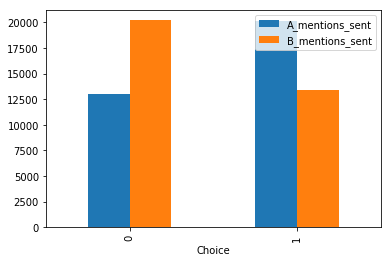

In [14]:
df2 = df[['A_mentions_sent','B_mentions_sent','Choice']]
group2 = df2.groupby('Choice')
group2.size()
total1 = group2.sum()

#Visualizing the data
my_plot = total1.plot(kind='bar')

Text(0,0.5,'')

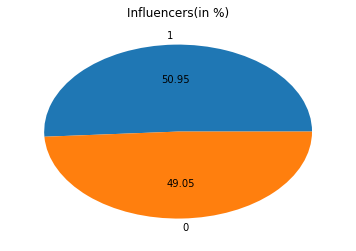

In [23]:
solved = pd.DataFrame(df, columns = ['Choice']) 
resolution = solved.stack().value_counts()
ax = resolution.plot(kind = 'pie',
title = 'Influencers(in %)',autopct='%.2f')
ax.set_ylabel('')